In [1]:
####### https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow
import pandas as pd

people = pd.read_csv("people.csv",parse_dates=['date'])
#data = pd.read_csv("act_train.csv",parse_dates=['date'])
trainSub = pd.read_csv("act_train.csv",nrows=700000, parse_dates=['date'])
test = pd.read_csv("act_test.csv",parse_dates=['date'])
act = test['activity_id']

In [2]:
trainSub.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [3]:
from datetime import datetime

trainSub.iloc[0]['date']
#trainSub['date'] = datetime.strptime(trainSub['date'], '%Y-%m-%d')

mergedTrain = trainSub.merge(right=people,on="people_id")
#mergedTrain['duration'] = mergedTrain.apply(mergedTrain[d].max() - mergedTrain[d].min())

In [4]:
#data = data.fillna("nop")
mergedTrain = mergedTrain.fillna("nop")
#mergedTrain.info()

In [5]:
#mergedTrain["char_1_x"].unique()
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder
#for i in mergedTrain:
#    if  :
#        print(mergedTrain[i])
        #mergedTrain[i] = le.fit_transform(mergedTrain[i])
mergedTrain = mergedTrain.apply(LabelEncoder().fit_transform)
for d in ['date_x', 'date_y']:
    mergedTrain['duration'] = mergedTrain[d].max() - mergedTrain[d].min()

In [6]:
mergedTrain = mergedTrain.drop(["people_id",'activity_id'],axis=1)

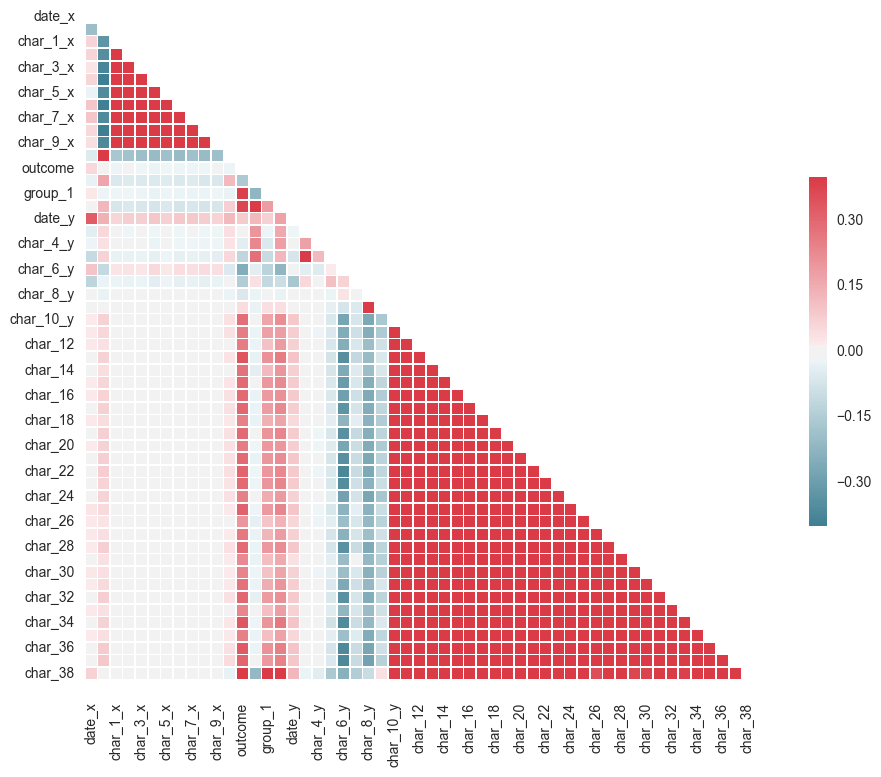

In [7]:
%matplotlib inline
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = mergedTrain.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [8]:
outcomeCorr = mergedTrain.corr()["outcome"]

highCorr = outcomeCorr >.20

correl = outcomeCorr[highCorr].drop('outcome').index

#highCorr = [name for num in outcomeCorr if num > abs(.15)]

In [9]:
correl

Index(['group_1', 'char_2_y', 'char_10_y', 'char_11', 'char_12', 'char_13',
       'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19',
       'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25',
       'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31',
       'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37',
       'char_38'],
      dtype='object')

In [10]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#X_new,y_new = SelectKBest(chi2, k=10).fit_transform(X, y),
#print(X_new.shape)

X,y = mergedTrain[correl],mergedTrain["outcome"]
X = X.as_matrix()
print(type(X))
print(X.shape)

y = y.as_matrix()
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(700000, 31)
<class 'numpy.ndarray'>
(700000,)


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.4)
#X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, random_state=1,test_size=.4)

In [119]:
import tensorflow.contrib.learn as skflow
import tensorflow as tf
import time
from sklearn import metrics

start_time = time.time()

classifier = skflow.DNNClassifier(hidden_units=[6,5,10,5], n_classes=2)

import logging
logging.getLogger().setLevel(logging.INFO)

classifier.fit(X_train, y_train,max_steps=200)

y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)


print(metrics.confusion_matrix(y_test, y_pred))

print("Accuracy: %f" % score)

print("--- %s seconds ---" % (time.time() - start_time))

Instructions for updating:
Pass `tf.contrib.learn.infer_real_valued_columns_from_input(x)` or `tf.contrib.learn.infer_real_valued_columns_from_input_fn(input_fn)` as `feature_columns`, where `x` or `input_fn` is your argument to `fit`, `evaluate`, or `predict`.
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=33, default_value=None, dtype=tf.int64)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py:1811: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  result_shape.insert(dim, 1)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 31.4537
INFO:tensorflow:Step 101: loss = 0.427746
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/sd/t9h_108138d5609g6slrk9y80000gn/T/tmp95pxv_ij/model.ckpt.
INFO:tensorflow:Loss for final step: 0.403981.
INFO:tensorflow:Transforming feature_column _RealValuedColumn(

[[26630  2369]
 [ 4760  6241]]
Accuracy: 0.821775
--- 31.13181710243225 seconds ---


In [90]:
#y_pred = classifier.predict(X_test)
#print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.56      1.00      0.71    488226
          1       0.00      0.00      0.00    390691

avg / total       0.31      0.56      0.40    878917



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100) #oob_score=True, n_estimators=20
#rfk = RandomForestClassifier(oob_score=True, n_estimators=20)

gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

#rfk.fit(X_new_train, y_new_train)
#y_new_pred = rfk.predict(X_new_test)
#print(metrics.accuracy_score(y_new_test, y_new_pred))

0.935925


In [92]:
test.head()

,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,...,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,duration
0,3,0,42,2,7,1,6,1,1,16,...,1,1,1,1,1,1,1,1,76,1175
1,3,4,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,76,1175
2,89,0,4,1,7,4,6,1,1,5,...,1,1,1,1,1,1,1,1,90,1175
3,133,0,13,2,7,4,6,1,1,14,...,1,1,1,1,1,1,1,1,90,1175
4,90,4,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,90,1175


In [93]:
test = test.fillna("nop")
test = test.merge(right=people,on="people_id")
test = test.drop(["people_id",'activity_id'],axis=1)
test = test.apply(LabelEncoder().fit_transform)

for d in ['date_x', 'date_y']:
    test['duration'] = test[d].max() - test[d].min()

KeyError: 'people_id'

In [94]:
test.head()

,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,char_8_x,...,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,duration
0,3,0,42,2,7,1,6,1,1,16,...,1,1,1,1,1,1,1,1,76,1175
1,3,4,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,76,1175
2,89,0,4,1,7,4,6,1,1,5,...,1,1,1,1,1,1,1,1,90,1175
3,133,0,13,2,7,4,6,1,1,14,...,1,1,1,1,1,1,1,1,90,1175
4,90,4,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,90,1175


In [95]:
fuit = classifier.predict(test)

In [96]:
#test = test.apply(LabelEncoder().inverse_transform)
submission = pd.DataFrame(act)


submission['outcome'] = fuit

In [98]:
submission['outcome'].unique()

array([0])

In [89]:
submission.to_csv('submission.csv',index=False)